# Spray Data (2011 and 2013)

Spray data is available for 2011 and 2013. In this notebook, we will compare the train and spray datasets for 2011 and 2013 to determine if spraying affects the presence of West Nile Virus.

Specifically, we will search through locations that have been sprayed within the last 10 days within a certain radius to determine if spraying had an effect on the presence of the virus.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
# Read data
train_cleaned = pd.read_csv('../datasets/train_cleaned.csv', parse_dates=['date'], index_col=['date'])
test_cleaned = pd.read_csv('../datasets/test_cleaned.csv', parse_dates=['date'], index_col=['date'])
spray = pd.read_csv('../datasets/spray.csv')

In [3]:
# Drop duplicates
spray.drop_duplicates(subset=['Date', 'Latitude','Longitude'], inplace=True)

In [4]:
# Set date as index
spray['Date']=pd.to_datetime(spray['Date'],format=('%Y-%m-%d'))
spray.set_index('Date',drop=True,inplace=True)

In [5]:
# Check spray data
spray.head()

,Time,Latitude,Longitude
Date,,,
2011-08-29,6:56:58 PM,42.391623,-88.089163
2011-08-29,6:57:08 PM,42.391348,-88.089163
2011-08-29,6:57:18 PM,42.391022,-88.089157
2011-08-29,6:57:28 PM,42.390637,-88.089158
2011-08-29,6:57:38 PM,42.390410,-88.088858


In [6]:
# Spray dates are between 2011 and 2013
spray.index

DatetimeIndex(['2011-08-29', '2011-08-29', '2011-08-29', '2011-08-29',
               '2011-08-29', '2011-08-29', '2011-08-29', '2011-08-29',
               '2011-08-29', '2011-08-29',
               ...
               '2013-09-05', '2013-09-05', '2013-09-05', '2013-09-05',
               '2013-09-05', '2013-09-05', '2013-09-05', '2013-09-05',
               '2013-09-05', '2013-09-05'],
              dtype='datetime64[ns]', name='Date', length=14294, freq=None)

In [7]:
# Check train_cleaned data from 2011-2013
train_cleaned.loc['2011':'2013']

,trap,lat,long,station,accuracy,species_ERRATICUS,species_PIPIENS,species_PIPIENS/RESTUANS,species_RESTUANS,species_SALINARIUS,species_TARSALIS,species_TERRITANS,num_mos,wnv
date,,,,,,,,,,,,,,
2011-06-10,T003,41.964242,-87.757639,1,8,0,0,1,0,0,0,0,3,0
2011-06-10,T013,41.923738,-87.785288,1,9,0,0,1,0,0,0,0,1,0
2011-06-10,T013,41.923738,-87.785288,1,9,0,0,0,1,0,0,0,1,0
2011-06-10,T017,41.960616,-87.777189,1,9,0,0,0,1,0,0,0,2,0
2011-06-10,T018,42.010412,-87.662140,1,8,0,0,0,1,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-09-26,T232,41.912563,-87.668055,2,9,0,0,1,0,0,0,0,1,0
2013-09-26,T233,42.009876,-87.807277,1,9,0,0,1,0,0,0,0,5,0
2013-09-26,T235,41.776428,-87.627096,2,8,0,0,1,0,0,0,0,1,0


In [8]:
# Check train_cleaned 2011-2013 dates
set(train_cleaned.loc['2011':'2013'].index)

{Timestamp('2011-06-10 00:00:00'),
 Timestamp('2011-06-17 00:00:00'),
 Timestamp('2011-06-24 00:00:00'),
 Timestamp('2011-06-30 00:00:00'),
 Timestamp('2011-07-11 00:00:00'),
 Timestamp('2011-07-15 00:00:00'),
 Timestamp('2011-07-25 00:00:00'),
 Timestamp('2011-07-29 00:00:00'),
 Timestamp('2011-08-05 00:00:00'),
 Timestamp('2011-08-12 00:00:00'),
 Timestamp('2011-08-19 00:00:00'),
 Timestamp('2011-08-26 00:00:00'),
 Timestamp('2011-09-01 00:00:00'),
 Timestamp('2011-09-02 00:00:00'),
 Timestamp('2011-09-12 00:00:00'),
 Timestamp('2011-09-16 00:00:00'),
 Timestamp('2011-09-23 00:00:00'),
 Timestamp('2011-09-30 00:00:00'),
 Timestamp('2013-06-07 00:00:00'),
 Timestamp('2013-06-14 00:00:00'),
 Timestamp('2013-06-21 00:00:00'),
 Timestamp('2013-06-27 00:00:00'),
 Timestamp('2013-06-28 00:00:00'),
 Timestamp('2013-07-08 00:00:00'),
 Timestamp('2013-07-12 00:00:00'),
 Timestamp('2013-07-19 00:00:00'),
 Timestamp('2013-07-25 00:00:00'),
 Timestamp('2013-08-01 00:00:00'),
 Timestamp('2013-08-

In [9]:
# Check spray dates
set(spray.index)

{Timestamp('2011-08-29 00:00:00'),
 Timestamp('2011-09-07 00:00:00'),
 Timestamp('2013-07-17 00:00:00'),
 Timestamp('2013-07-25 00:00:00'),
 Timestamp('2013-08-08 00:00:00'),
 Timestamp('2013-08-15 00:00:00'),
 Timestamp('2013-08-16 00:00:00'),
 Timestamp('2013-08-22 00:00:00'),
 Timestamp('2013-08-29 00:00:00'),
 Timestamp('2013-09-05 00:00:00')}

<ipython-input-10-d3b6be4e0a9a>:16: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.scatter(x=train_cleaned.loc[train_cleaned['wnv'] >= 1][dates[i]]['long'],
<ipython-input-10-d3b6be4e0a9a>:17: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  y=train_cleaned.loc[train_cleaned['wnv'] >= 1][dates[i]]['lat'], c='r', s=1, label='wnv')
<ipython-input-10-d3b6be4e0a9a>:16: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.scatter(x=train_cleaned.loc[train_cleaned['wnv'] >= 1][dates[i]]['long'],
<

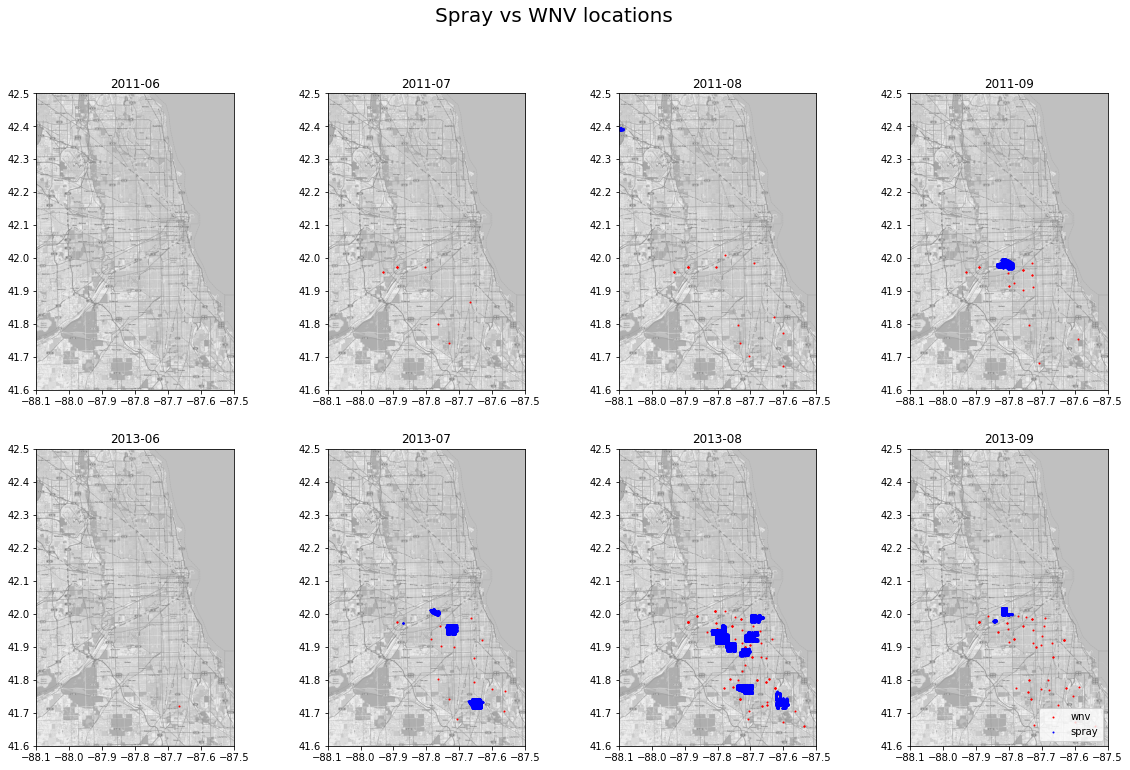

In [10]:
# Plot locations of WNV versus spray locations
origin = [41.6, -88.1]              # lat/long of origin (lower left corner)
upperRight = [42.5, -87.5]          # lat/long of upper right corner

mapdata = np.loadtxt("../datasets/mapdata_copyright_openstreetmap_contributors.txt")

# Spray dates
dates = ['2011-06', '2011-07', '2011-08', '2011-09',
         '2013-06', '2013-07', '2013-08', '2013-09']

# Generate plots
plt.figure(figsize=(20,12))
for i in range(len(dates)):
    plt.subplot(2,4,i+1)
    plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
    plt.scatter(x=train_cleaned.loc[train_cleaned['wnv'] >= 1][dates[i]]['long'],
                y=train_cleaned.loc[train_cleaned['wnv'] >= 1][dates[i]]['lat'], c='r', s=1, label='wnv')
    plt.title(dates[i])
    try:
        plt.scatter(x=spray[dates[i]]['Longitude'], y=spray[dates[i]]['Latitude'], c='b', s=1, label='spray')        
    except:
        None
plt.suptitle('Spray vs WNV locations', fontsize=20)
plt.legend(loc='lower right');


The spray dates in 2011 and 2013 do not exactly match the train data dates in 2011 and 2013.

From the plots, spraying does not seem to have a strong effect on reducing the presence of the virus in subsequent months. For example, several locations that were sprayed in August 2013 were still found with the virus in September 2013.

We can search for locations in the train data that have been sprayed within the last 10 days to further examine the effect of spraying.

In [11]:
# Create distance function to compute distance based on coordinates
def distance(origin, destination):
    
    # Origin and destination coordinates
    lat1, lon1 = origin
    lat2, lon2 = destination
    
    # Radius of the Earth in km
    radius = 6371
    

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    
    # Returns distance in km
    return d

In [ ]:
# Create columns to map sprayed locations to train data
# Check if train data locations have been sprayed within a certain radius (m) and timeframe (days)
sprayed_100m = []
sprayed_500m = []
sprayed_1000m = []
num_days = 10

# Iterate through 2011-2013 train data
for train_date, train_data in train_cleaned.loc['2011':'2013'].iterrows():
    
    # Set number of sprays (within radius) to be 0
    sprays_within_100m = 0
    sprays_within_500m = 0
    sprays_within_1000m = 0
    
    # Iterate through spray data
    for spray_date, spray_loc in spray.iterrows():
        
        # Check if spray date was within num_days of train_date
        if (train_date - spray_date).days <= num_days:
            
            # Check if spray location is within radius of train location            
            if distance((train_data['lat'], train_data['long']),
                             (spray_loc['Latitude'], spray_loc['Longitude']))*1000 <= 100:
                
                sprays_within_100m += 1
                
            if distance((train_data['lat'], train_data['long']),
                             (spray_loc['Latitude'], spray_loc['Longitude']))*1000 <= 500:
                
                sprays_within_500m += 1
                
            if distance((train_data['lat'], train_data['long']),
                             (spray_loc['Latitude'], spray_loc['Longitude']))*1000 <= 1000:
                
                sprays_within_1000m += 1
                
    # Append to results lists
    sprayed_100m.append(sprays_within_100m)
    sprayed_500m.append(sprays_within_500m)
    sprayed_1000m.append(sprays_within_1000m)

In [ ]:
# Append spray data to train data for 2011 and 2013
# This is the total number of sprays within a certain radius in the last 10 days

sprayed_2011_2013 = train_cleaned.loc['2011':'2013'].copy()
sprayed_2011_2013['sprayed_100m'] = sprayed_100m
sprayed_2011_2013['sprayed_500m'] = sprayed_500m
sprayed_2011_2013['sprayed_1000m'] = sprayed_1000m
sprayed_2011_2013.head()

In [ ]:
sprayed_2011_2013.loc[sprayed_2011_2013['wnv'] >= 1].mean()

In [ ]:
sprayed_2011_2013.loc[sprayed_2011_2013['wnv'] == 0].mean()

In [ ]:
sprayed_2011_2013.groupby(by='wnv').mean()

Based on the above, locations that have been sprayed within 100m, 500, or 1000m do not show a reduction in the presence of WNV.

We can examine further by creating dummy columns.

In [ ]:
# Create dummy column for WNV
sprayed_2011_2013['wnv_binary'] = sprayed_2011_2013['wnv'].map(lambda x: 0 if x == 0 else 1)

In [ ]:
# Create dummy columns for the spray data
sprayed_2011_2013['sprayed_100m_binary'] = sprayed_2011_2013['sprayed_100m'].map(lambda x: 0 if x == 0 else 1)
sprayed_2011_2013['sprayed_500m_binary'] = sprayed_2011_2013['sprayed_500m'].map(lambda x: 0 if x == 0 else 1)
sprayed_2011_2013['sprayed_1000m_binary'] = sprayed_2011_2013['sprayed_1000m'].map(lambda x: 0 if x == 0 else 1)

In [ ]:
sprayed_2011_2013.loc[sprayed_2011_2013['wnv_binary'] == 1].mean()

In [ ]:
sprayed_2011_2013.loc[sprayed_2011_2013['wnv_binary'] == 0].mean()

Based on the above, whether a location was sprayed within 100m, 500m or 1000m in the last 10 days does not seem to affect the presence of the WNV.

We can search for prayed locations within 10 days for 10m, 30m and 50m to confirm.

In [ ]:
# Create columns to map sprayed locations to train data
# Check if train data locations have been sprayed within a certain radius (m) and timeframe (days)
sprayed_10m = []
sprayed_30m = []
sprayed_50m = []
num_days = 10
count = 0

# Iterate through 2011-2013 train data
for train_date, train_data in train_cleaned.loc['2011':'2013'].iterrows():
    
    # Set number of sprays (within radius) to be 0
    sprays_within_10m = 0
    sprays_within_30m = 0
    sprays_within_50m = 0
    
    # Iterate through spray data
    for spray_date, spray_loc in spray.iterrows():
        
        # Check if spray date was within num_days of train_date
        if (train_date - spray_date).days <= num_days:
            
            # Check if spray location is within radius of train location            
            if distance((train_data['lat'], train_data['long']),
                             (spray_loc['Latitude'], spray_loc['Longitude']))*1000 <= 10:
                
                sprays_within_10m += 1
                
            if distance((train_data['lat'], train_data['long']),
                             (spray_loc['Latitude'], spray_loc['Longitude']))*1000 <= 30:
                
                sprays_within_30m += 1
                
            if distance((train_data['lat'], train_data['long']),
                             (spray_loc['Latitude'], spray_loc['Longitude']))*1000 <= 50:
                
                sprays_within_50m += 1
        
        # Print the count status to monitor progress. There are about 54 million iterations to check.
        count += 1
        if count % 1000000 == 0:
            print(count)
                
    # Append to results lists
    sprayed_10m.append(sprays_within_10m)
    sprayed_30m.append(sprays_within_30m)
    sprayed_50m.append(sprays_within_50m)

In [ ]:
# Create columns for total number of sprays
sprayed_2011_2013['sprayed_10m'] = sprayed_10m
sprayed_2011_2013['sprayed_30m'] = sprayed_30m
sprayed_2011_2013['sprayed_50m'] = sprayed_50m

In [ ]:
# Create dummy columns for whether a location has been sprayed
sprayed_2011_2013['sprayed_10m_binary'] = sprayed_2011_2013['sprayed_10m'].map(lambda x: 0 if x == 0 else 1)
sprayed_2011_2013['sprayed_30m_binary'] = sprayed_2011_2013['sprayed_30m'].map(lambda x: 0 if x == 0 else 1)
sprayed_2011_2013['sprayed_50m_binary'] = sprayed_2011_2013['sprayed_50m'].map(lambda x: 0 if x == 0 else 1)

In [ ]:
# Save spray data
sprayed_2011_2013.to_csv('../datasets/sprayed_2011_2013.csv')

In [ ]:
sprayed_2011_2013 = pd.read_csv('../datasets/sprayed_2011_2013.csv', parse_dates=['date'], index_col=['date'])

In [ ]:
sprayed_2011_2013.head()

In [ ]:
# Check spray data of locations that have and do not have WNV
sprayed_2011_2013[['wnv', 'wnv_binary', 'num_mos', 'sprayed_10m_binary',
                   'sprayed_30m_binary', 'sprayed_50m_binary',
                   'sprayed_100m_binary', 'sprayed_500m_binary',
                   'sprayed_1000m_binary']].groupby('wnv_binary').mean()

In [ ]:
# Check WNV presence of locations that have been sprayed within 100m
sprayed_2011_2013[['wnv', 'wnv_binary', 'num_mos', 'sprayed_10m_binary',
                   'sprayed_30m_binary', 'sprayed_50m_binary',
                   'sprayed_100m_binary', 'sprayed_500m_binary',
                   'sprayed_1000m_binary']].groupby('sprayed_100m_binary').mean()

In [ ]:
# Check WNV presence of locations that have been sprayed within 10m
sprayed_2011_2013[['wnv', 'wnv_binary', 'num_mos', 'sprayed_10m_binary',
                   'sprayed_30m_binary', 'sprayed_50m_binary',
                   'sprayed_100m_binary', 'sprayed_500m_binary',
                   'sprayed_1000m_binary']].groupby('sprayed_10m_binary').mean()

In [ ]:
# Check WNV presence of locations that have been sprayed within 30m
sprayed_2011_2013[['wnv', 'wnv_binary', 'num_mos', 'sprayed_10m_binary',
                   'sprayed_30m_binary', 'sprayed_50m_binary',
                   'sprayed_100m_binary', 'sprayed_500m_binary',
                   'sprayed_1000m_binary']].groupby('sprayed_30m_binary').mean()

In [ ]:
# Check WNV presence of locations that have been sprayed within 50m
sprayed_2011_2013[['wnv', 'wnv_binary', 'num_mos', 'sprayed_10m_binary',
                   'sprayed_30m_binary', 'sprayed_50m_binary',
                   'sprayed_100m_binary', 'sprayed_500m_binary',
                   'sprayed_1000m_binary']].groupby('sprayed_50m_binary').mean()

Based on the above, locations which have been sprayed within 10m, 30m and 50m within the last 10 days show a minor decrease in the number of mosquitos caught. There is also a very minor increase in the presence of the WNV for locations that have been sprayed 10m, 30m and 50m within thte last 10 days. However, spray data was only available for a few dates in 2011 and 2013.

As the spray data for the test data years (2008, 2010 and 2012) are unavailable, and the effect of the spraying on the WNV is not substantial, we can **exclude the spray data from our modelling**.